In [ ]:
!git clone https://github.com/julianricom1/Clasificacion-de-textos-medicos.git

Cloning into 'Clasificacion-de-textos-medicos'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 3), reused 22 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 688.33 KiB | 16.39 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Clasificacion-de-textos-medicos/train.csv')
df.head()

,question,pmid,input_text,target_text,Adaptation_Version,Question_Type
0,1,29857264,Exercise-Associated Muscle Cramps (EAMC) are a...,Exercise-Associated Muscle Cramps (EAMC) are a...,2,C
1,1,33722257,"Background: Muscle cramp is a painful, involun...",Muscle cramps are unconscious contractions of ...,2,C
2,1,31696455,Muscle cramp is a temporary but intense and pa...,"Muscle cramp is a temporary but intense, painf...",2,C
3,1,30168894,Muscular cramp is a common symptom in healthy ...,"Muscle cramps are common in healthy people, es...",2,C
4,1,29763070,"Muscle cramps result in continuous, involuntar...",Muscle cramps cause constant and unintended co...,2,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   question            635 non-null    int64 
 1   pmid                635 non-null    object
 2   input_text          635 non-null    object
 3   target_text         635 non-null    object
 4   Adaptation_Version  635 non-null    int64 
 5   Question_Type       635 non-null    object
dtypes: int64(2), object(4)
memory usage: 29.9+ KB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Descargar recursos de NLTK si no los tienes
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


df = df[["input_text", "target_text"]]


df_long = pd.DataFrame({
    "text": list(df["input_text"]) + list(df["target_text"]),
    "label": ["input text"] * len(df) + ["target text"] * len(df)
})




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words("english"))

def tokenize(text):
    tokens = nltk.word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

df_long["tokens"] = df_long["text"].apply(tokenize)
df_long["length_words"] = df_long["tokens"].apply(len)

In [ ]:
print("\nNúmero de textos por tipo:")
print(df_long["label"].value_counts())

print("\nLongitud promedio de palabras por tipo:")
print(df_long.groupby("label")["length_words"].mean())

print("\nVocabulario único por tipo:")
print(df_long.groupby("label")["tokens"].apply(lambda x: len(set([t for tokens in x for t in tokens]))))


Número de textos por tipo:
label
input text     635
target text    635
Name: count, dtype: int64

Longitud promedio de palabras por tipo:
label
input text     132.727559
target text    137.379528
Name: length_words, dtype: float64

Vocabulario único por tipo:
label
input text     8898
target text    7355
Name: tokens, dtype: int64


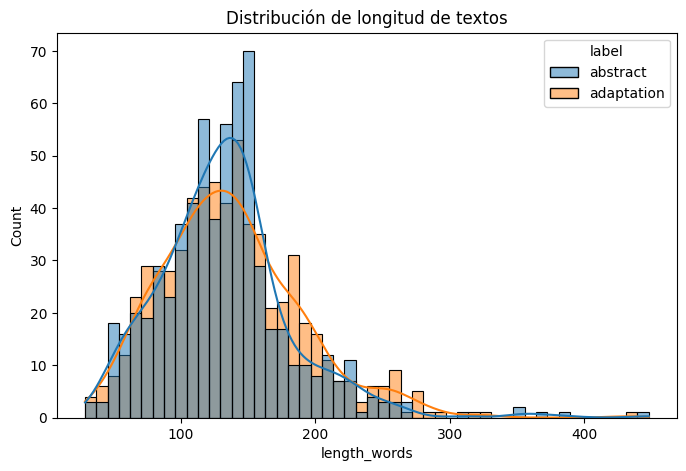

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_long, x="length_words", hue="label", kde=True, bins=50)
plt.title("Distribución de longitud de textos")
plt.show()

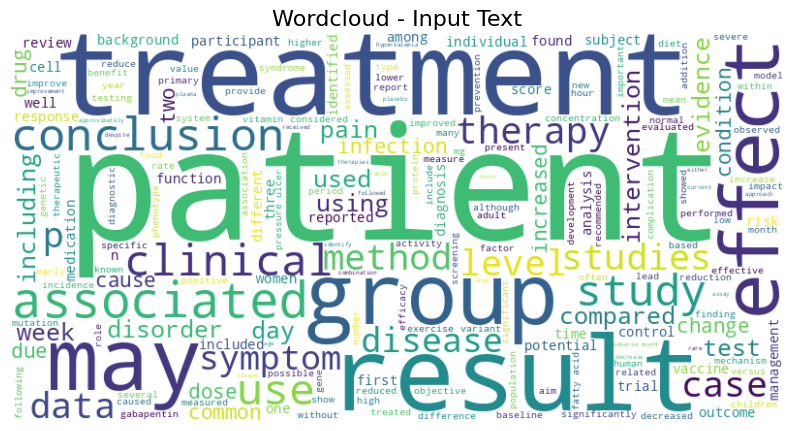

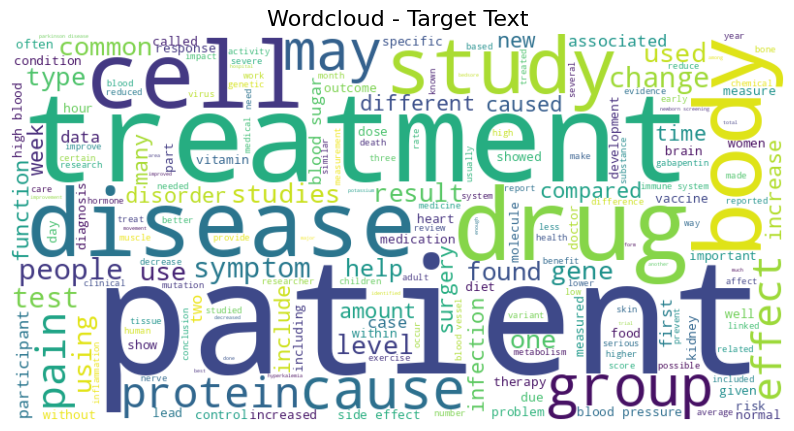

In [ ]:
def plot_wordcloud(texts, title):
    all_words = " ".join([" ".join(t) for t in texts])
    wc = WordCloud(width=800, height=400, background_color="white").generate(all_words)
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(df_long[df_long["label"]=="input text"]["tokens"], "Wordcloud - Input Text")
plot_wordcloud(df_long[df_long["label"]=="target text"]["tokens"], "Wordcloud - Target Text")

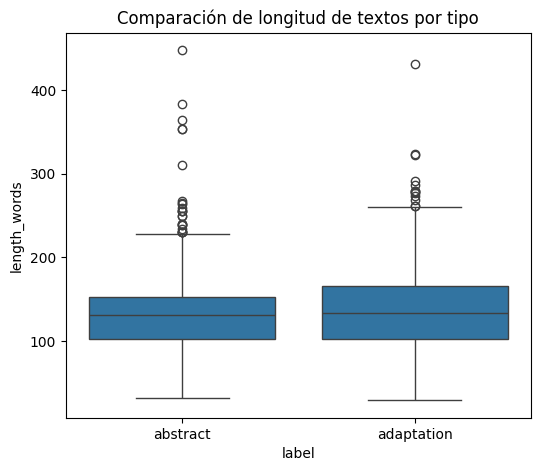

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_long, x="label", y="length_words")
plt.title("Comparación de longitud de textos por tipo")
plt.show()

Preparación de datos

In [ ]:
import pandas as pd
import re

df = pd.read_csv('train.csv')

records = []
for _, row in df.iterrows():
    records.append({'text': row['input_text'], 'label': 'technical'})
    records.append({'text': row['target_text'], 'label': 'plain'})

dataset = pd.DataFrame(records)

# Función de limpieza
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

dataset['text'] = dataset['text'].apply(clean_text)

# Eliminación de datos duplicados
dataset = dataset.drop_duplicates(subset=['text','label'])

# Convertir etiquetas a binario (1=technical, 0=plain)
dataset['label'] = dataset['label'].map({'technical':1, 'plain':0})

# Guardar dataset limpio
dataset.to_csv('cleaned_dataset.csv', index=False)
